# Data-X project : Metal Price Forecasting @ DeepVu

#### Clement's notebook

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# Data source

In [20]:
df = pd.read_csv("metals_daily_train.csv")

In [21]:
df.describe()

,date,p0,p1,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
count,2.633000e+03,2360.000000,2360.000000,2360.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,...,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2633.000000,2.633000e+03
mean,2.013009e+07,477.936862,499.797818,486.364574,20.964078,21.541850,20.431452,20.936716,21.608640,22.063155,...,16757.833125,16900.573450,16613.373283,16757.111111,16791.377861,16938.957553,16643.593009,16790.220558,2265.748576,2.013004e+07
std,2.872433e+04,99.857689,97.626663,98.368382,8.297076,8.603851,8.034878,8.325021,7.569017,7.780929,...,3676.826724,3721.727138,3624.266259,3671.746128,3653.336963,3697.413360,3599.290043,3647.258673,148.620935,2.873209e+04
min,2.008070e+07,227.076039,261.009561,248.225419,11.250000,11.350000,11.100000,11.175000,12.150000,12.250000,...,8315.000000,8980.000000,8315.000000,8665.000000,8400.000000,8940.000000,8400.000000,8715.000000,2008.000000,2.008063e+07
25%,2.010122e+07,421.463849,447.606938,430.819771,15.400000,15.700000,15.100000,15.400000,16.350000,16.600000,...,14745.000000,14810.000000,14668.000000,14745.000000,14763.500000,14830.000000,14680.000000,14760.000000,2137.000000,2.010122e+07
50%,2.013061e+07,488.166240,516.953924,497.898846,18.350000,18.900000,17.850000,18.300000,19.160000,19.650000,...,15607.000000,15720.000000,15535.000000,15635.000000,15700.000000,15795.000000,15585.000000,15685.000000,2265.000000,2.013060e+07
75%,2.015113e+07,555.784731,571.196938,562.304544,23.900000,24.750000,23.300000,23.950000,24.850000,25.420000,...,18025.000000,18177.500000,17877.500000,18043.000000,18183.500000,18320.000000,18007.000000,18202.500000,2394.000000,2.015112e+07
max,2.018052e+07,645.057249,670.873485,654.272352,65.860000,67.890000,62.650000,66.230000,59.440000,60.870000,...,27065.000000,27235.000000,26700.000000,26915.000000,27000.000000,27750.000000,26650.000000,26865.000000,2523.000000,2.018051e+07


In [22]:
df.shape

(2633, 558)

In [23]:
df.tail(10)

,date,p0,p1,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
2623,20180507,555.734038,570.499919,578.554035,16.40,16.50,16.12,16.325,16.80,16.85,...,23200.0,23925.0,23145.0,23570.0,23050.0,23835.0,23010.0,23470.0,2522,20180507
2624,20180508,557.734102,571.205940,579.289043,16.35,16.57,16.20,16.225,16.78,16.95,...,23875.0,24000.0,23790.0,23880.0,23840.0,23950.0,23720.0,23810.0,2522,20180507
2625,20180509,556.268995,564.330865,572.392734,16.25,16.36,15.55,15.625,16.70,16.76,...,23750.0,23940.0,23605.0,23800.0,23675.0,23865.0,23495.0,23715.0,2522,20180507
2626,20180510,551.499501,563.576132,571.627220,15.60,15.75,14.85,15.075,16.16,16.27,...,23850.0,23960.0,23760.0,23860.0,23780.0,23890.0,23670.0,23780.0,2522,20180507
2627,20180511,554.157735,567.608165,577.023466,15.12,15.20,14.65,14.700,15.67,15.70,...,23900.0,23960.0,23695.0,23800.0,23830.0,23880.0,23585.0,23700.0,2522,20180507
2628,20180514,555.885726,581.521233,582.870470,14.65,14.70,14.20,14.475,15.35,15.35,...,23880.0,23910.0,23630.0,23755.0,23745.0,23820.0,23515.0,23665.0,2523,20180514
2629,20180515,558.735883,584.378351,581.679143,14.45,15.50,14.40,15.325,14.96,15.85,...,23605.0,23880.0,23560.0,23760.0,23480.0,23795.0,23450.0,23640.0,2523,20180514
2630,20180516,560.979551,583.904196,583.904196,15.30,15.42,14.60,14.675,15.76,15.83,...,23800.0,24050.0,23730.0,23890.0,23695.0,23980.0,23630.0,23790.0,2523,20180514
2631,20180517,558.631274,584.145683,582.802820,14.65,14.86,14.27,14.375,15.33,15.45,...,23825.0,24000.0,23640.0,23845.0,23745.0,23930.0,23530.0,23755.0,2523,20180514
2632,20180518,559.704335,585.267754,585.267754,14.35,14.80,14.22,14.525,15.07,15.36,...,23660.0,23930.0,23660.0,23815.0,23590.0,23820.0,23560.0,23700.0,2523,20180514


In [24]:
df.info

<bound method DataFrame.info of           date          p0          p1          p2  f000_open  f000_high  \
0     20080701         NaN         NaN         NaN     24.720     24.850   
1     20080702         NaN         NaN         NaN     23.800     24.990   
2     20080703         NaN         NaN         NaN     24.800     25.250   
3     20080704         NaN         NaN         NaN        NaN        NaN   
4     20080707         NaN         NaN         NaN     24.300     25.300   
5     20080708         NaN         NaN         NaN     24.900     25.180   
6     20080709         NaN         NaN         NaN     23.370     24.690   
7     20080710         NaN         NaN         NaN     24.510     25.200   
8     20080711         NaN         NaN         NaN     25.280     26.490   
9     20080714         NaN         NaN         NaN     24.750     25.960   
10    20080715         NaN         NaN         NaN     26.050     27.070   
11    20080716         NaN         NaN         NaN     2

In [25]:
df.isnull().sum()

date             0
p0             273
p1             273
p2             273
f000_open      144
f000_high      144
f000_low       144
f000_settle    144
f001_open      144
f001_high      144
f001_low       144
f001_settle    144
f002_open      142
f002_high      142
f002_low       142
f002_settle    142
f003_open      149
f003_high      149
f003_low       149
f003_settle    149
f004_open      149
f004_high      149
f004_low       149
f004_settle    149
f005_open      144
f005_high      144
f005_low       144
f005_settle    144
f006_open      144
f006_high      144
              ... 
f131_open      228
f131_high      228
f131_low       228
f131_settle    228
f132_open      228
f132_high      228
f132_low       228
f132_settle    228
f133_open      228
f133_high      228
f133_low       228
f133_settle    228
f134_open      228
f134_high      228
f134_low       228
f134_settle    228
f135_open      228
f135_high      228
f135_low       228
f135_settle    228
f136_open      230
f136_high   

# Missing Values

In [26]:
# Other team's work to fill the NaNs value
# We will just get rid of them for now

print('dataframe size before cut NaN', df.shape)
df = df.dropna(axis=0, how='any')
print('dataframe size after cut NaN', df.shape)

dataframe size before cut NaN (2633, 558)
dataframe size after cut NaN (2105, 558)


# Pre-Process

In [29]:
# We are predicting p1 only
df = df.drop(['p0', 'p2'], axis=1)

# Exploration

### What does p1 look like?

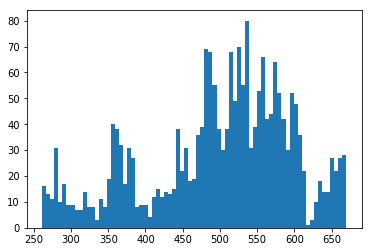

In [95]:
plt.hist(df.p1, bins=75)
plt.show()

### Correlations

1. Select open prices only - All vs All

In [45]:
keep_col = [0, 1] + list(range(2, 558, 4))
selected_columns = df.iloc[:, keep_col].columns

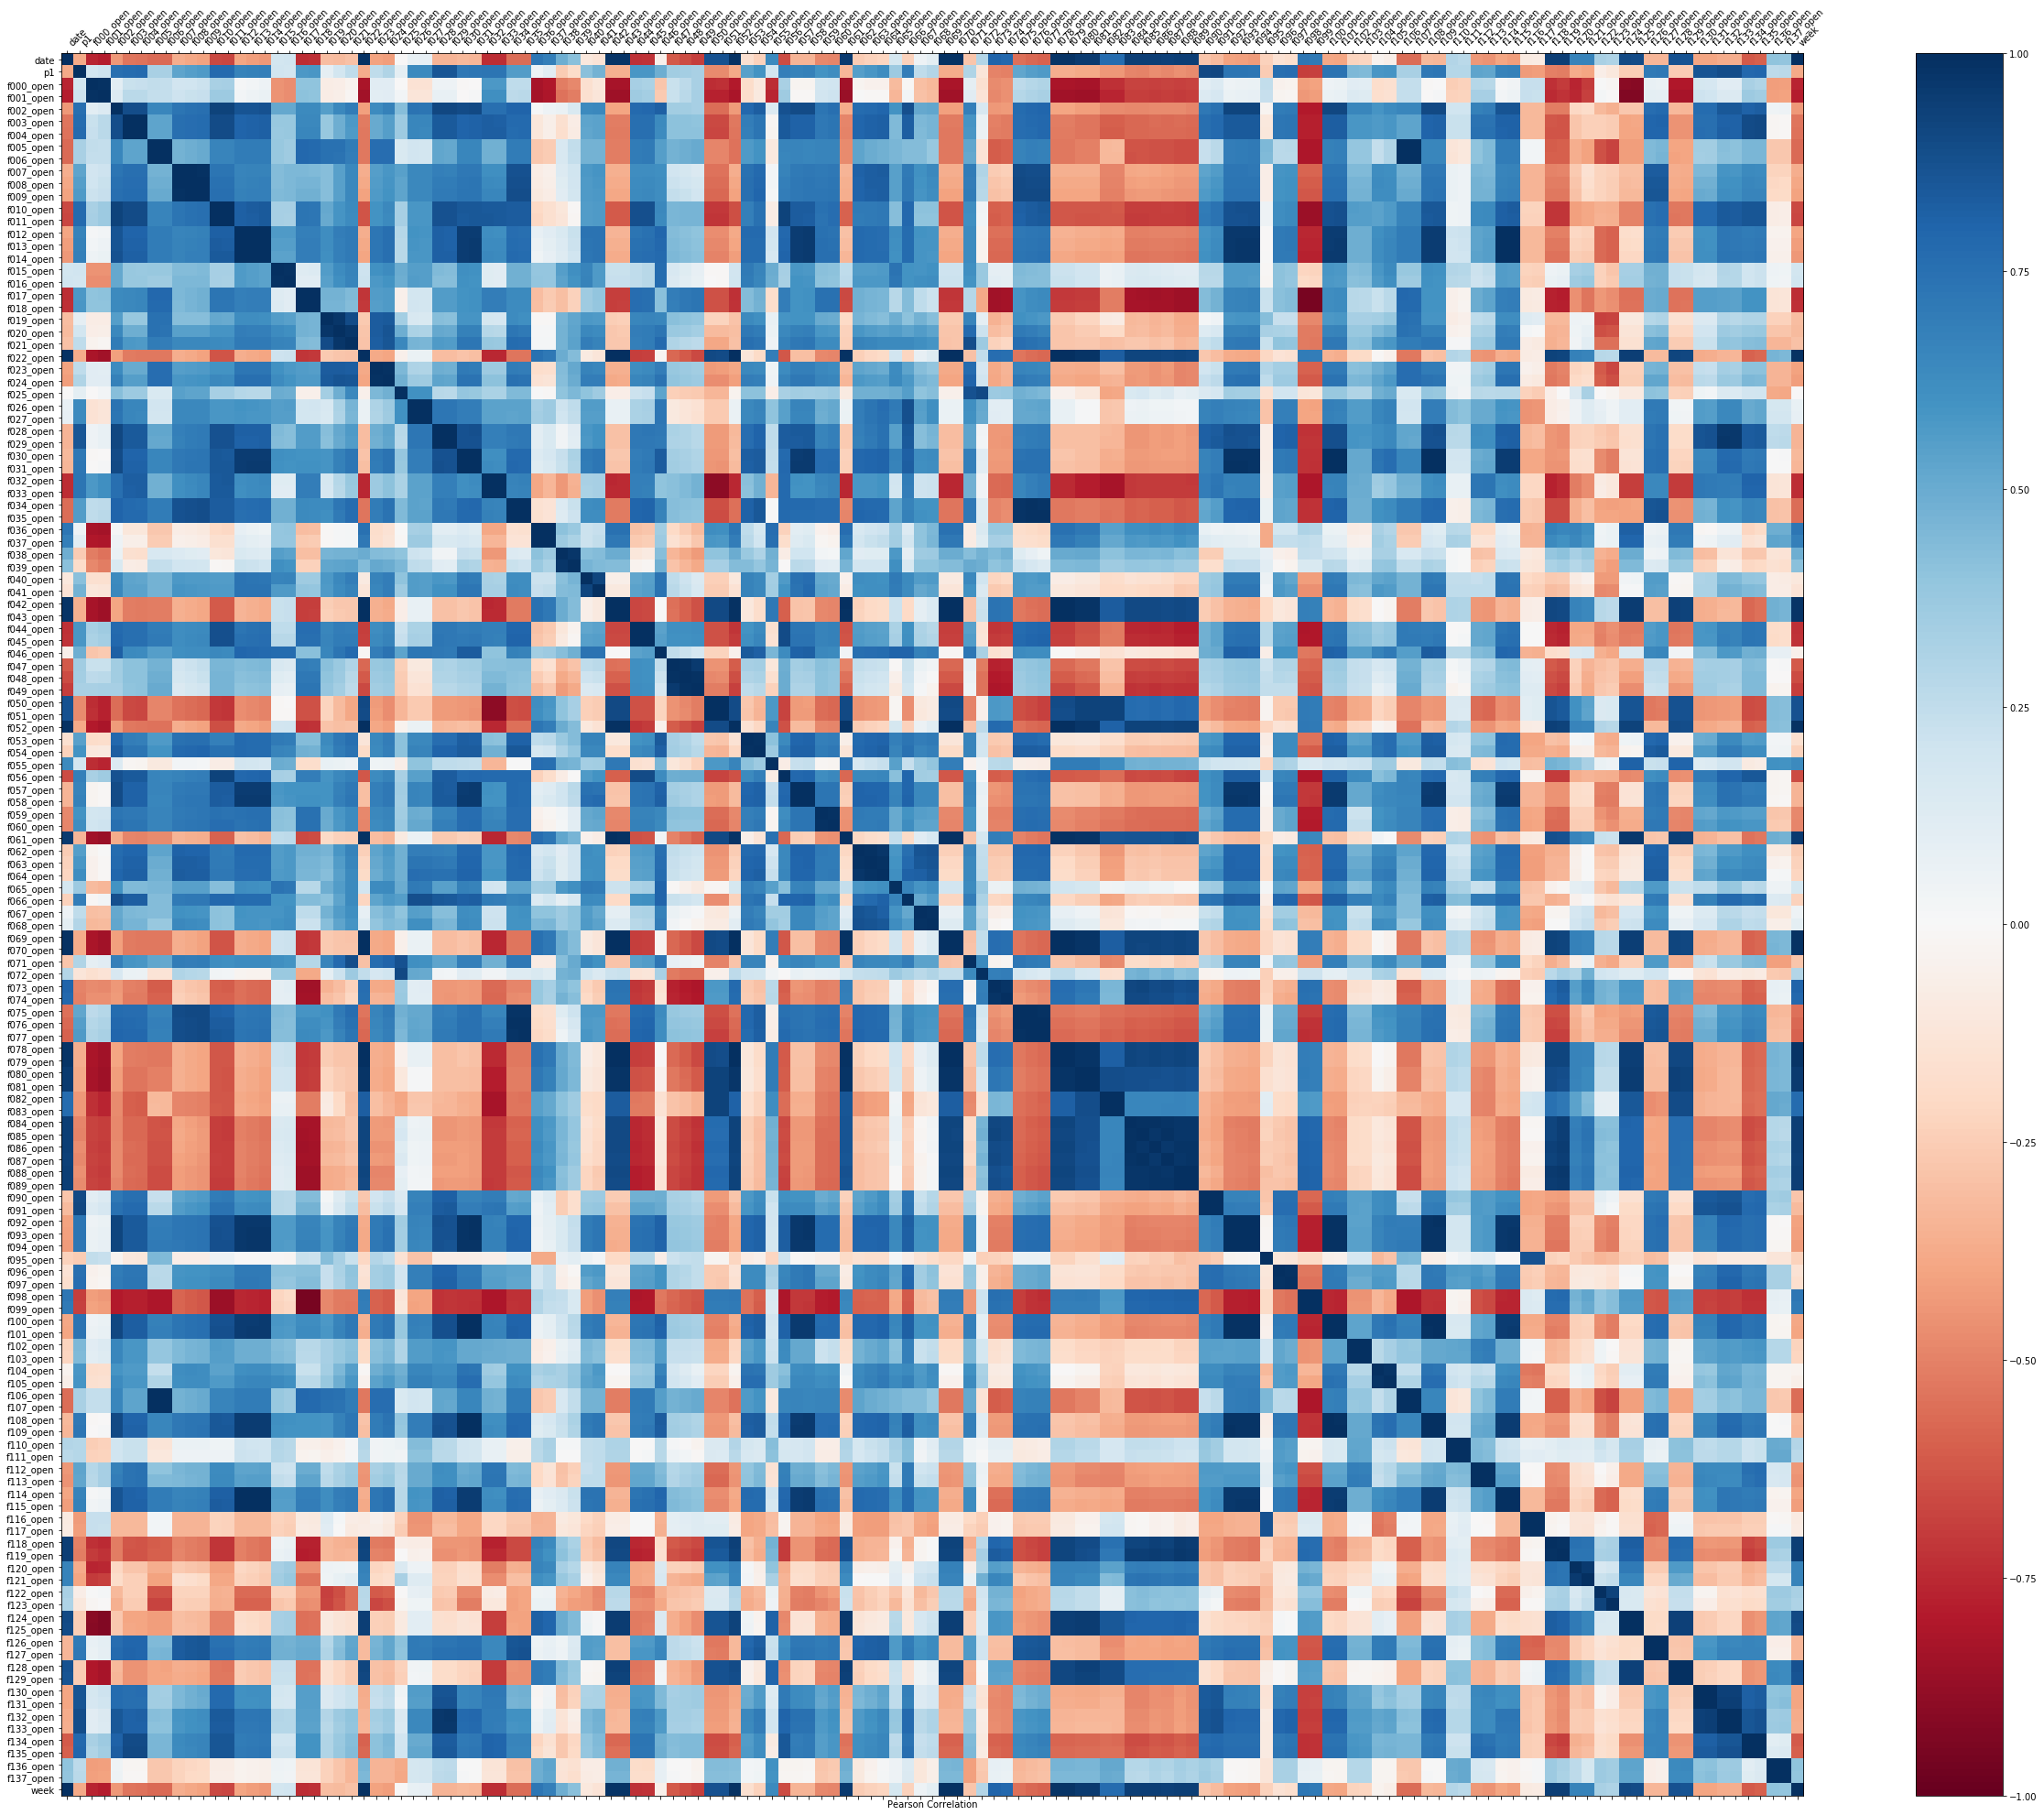

In [82]:
fig = plt.figure(figsize=(55,35))

correlations = df[selected_columns].corr(method='spearman')
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, cmap='RdBu',vmin=-1, vmax=1)
fig.colorbar(cax, fraction=0.046, pad=0.04)

ticks = np.arange(0,len(selected_columns),1)
ax.set_xlabel('Pearson Correlation')
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(selected_columns, rotation=45, ha='left')
ax.set_yticklabels(selected_columns)
plt.show()

2. Select open prices only - p1 vs All

In [83]:
correlations[['p1']]

,p1
date,-0.381824
p1,1.000000
f000_open,0.184550
f001_open,0.204819
f002_open,0.755026
f003_open,0.773347
f004_open,0.775115
f005_open,0.325651
f006_open,0.324984
f007_open,0.529105


In [87]:
# select features that corrleate highly with p1

mask = abs(correlations[['p1']]) > 0.75

correlations[mask][['p1']].dropna().sort_values(by=['p1'])

,p1
f096_open,0.750494
f002_open,0.755026
f097_open,0.758337
f003_open,0.773347
f004_open,0.775115
f010_open,0.777707
f011_open,0.779031
f134_open,0.788544
f135_open,0.792533
f028_open,0.856634


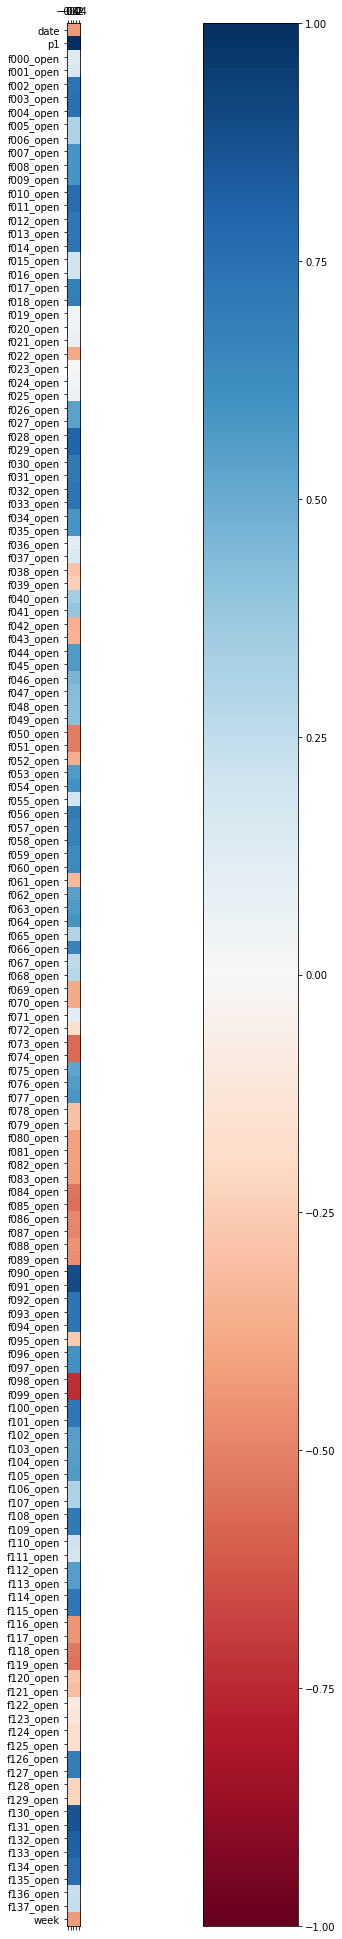

In [58]:
fig = plt.figure(figsize=(55,35))

correlations = df[selected_columns].corr(method='pearson')
ax = fig.add_subplot(111)
cax = ax.matshow(correlations[['p1']], cmap='RdBu',vmin=-1, vmax=1)
fig.colorbar(cax, fraction=0.046, pad=0.04)

ticks = np.arange(0,len(selected_columns),1)
#ax.set_xlabel('Pearson Correlation')
ax.set_yticks(ticks)
ax.set_yticklabels(selected_columns)
plt.show()

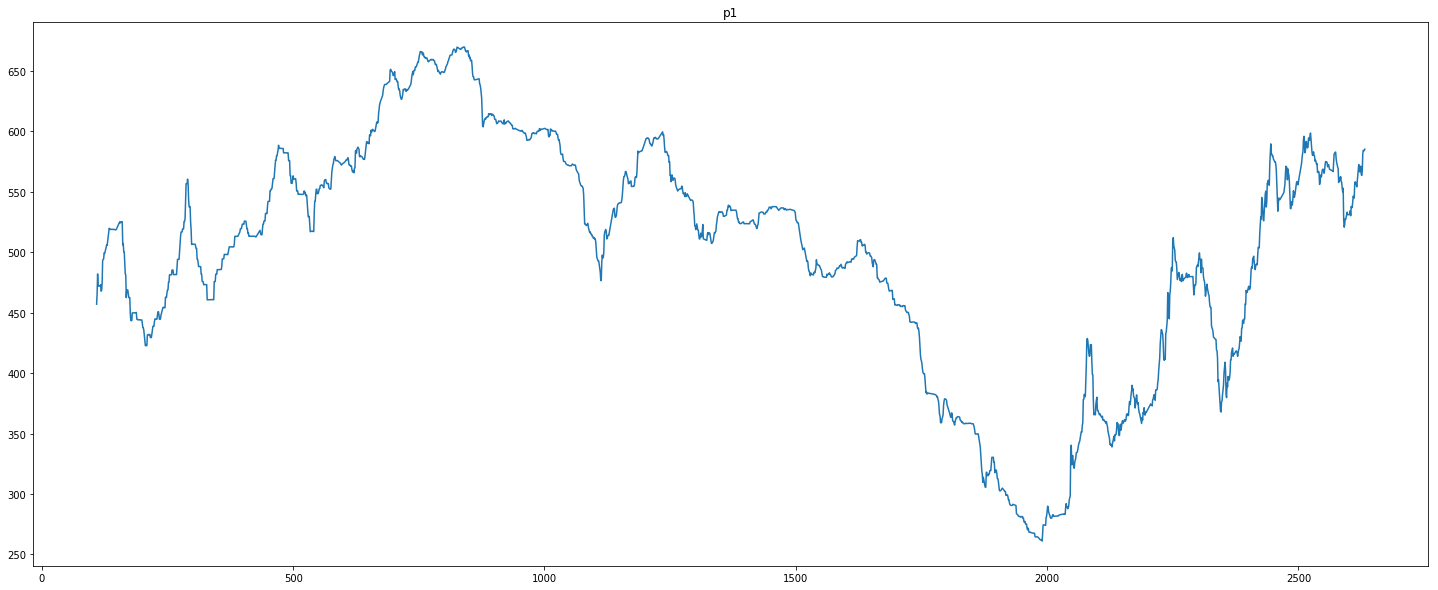

In [107]:
plt.figure(figsize=(25,10))
plt.plot(df['p1'])
plt.title('p1')
plt.show()

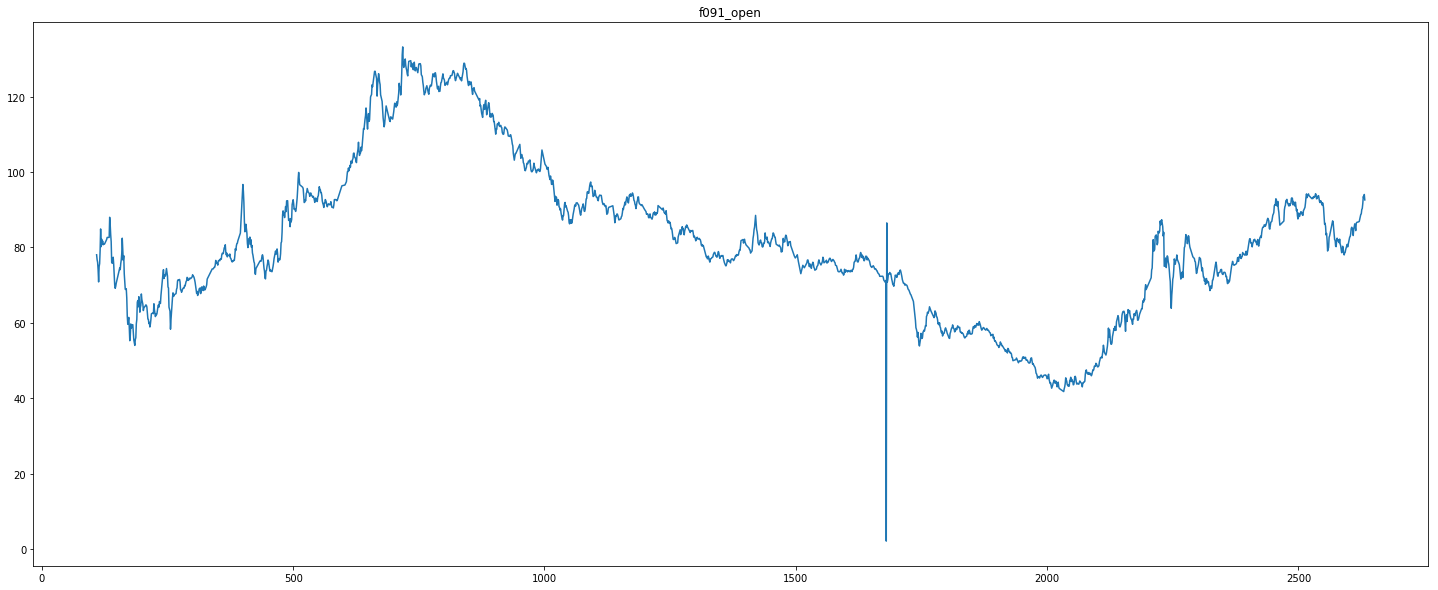

In [108]:
# example of a very spearman-correlated feature
plt.figure(figsize=(25,10))
plt.plot(df['f091_open'])
plt.title('f091_open')
plt.show()